In [1]:
%load_ext autoreload
%autoreload 2
%run ./initializer

Added the path (/Users/madalenabarcelo/Desktop/BA/DMT/assignment_2/DataMiningTechniquesA2) to sys.path


In [2]:
'''
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install polars
'''


'\n!pip install pandas\n!pip install matplotlib\n!pip install seaborn\n!pip install polars\n'

# EDA on Expedia Hotel Booking Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_analysis_utils as eda
import polars as pl
import os

from data_analysis_utils import DataExplorer

## Load the Data

In [8]:
data_explorer = DataExplorer()

train_path = '/Users/madalenabarcelo/Desktop/BA/DMT/assignment_2/DataMiningTechniquesA2/dmt-2025-2nd-assignment/training_set_VU_DM.csv'
train_df = data_explorer.load_data(train_path)

test_path = '/Users/madalenabarcelo/Desktop/BA/DMT/assignment_2/DataMiningTechniquesA2/dmt-2025-2nd-assignment/test_set_VU_DM.csv'
test_df = data_explorer.load_data(test_path)


## Summarize Dataset

In [11]:
print('--- Train ---')
summary_train = data_explorer.get_expedia_data_info(train_df)
print('--- Test ---')
summary_test = data_explorer.get_expedia_data_info(test_df)

--- Train ---
Number of observations (rows): 4958347
Number of features (columns): 54

Unique values per column:
orig_destination_distance      530595
srch_id                        199795
srch_query_affinity_score      199387
date_time                      198615
prop_id                        129113
price_usd                       76465
gross_bookings_usd              60687
srch_destination_id             18127
prop_location_score2             9342
visitor_hist_adr_usd             7799
comp1_rate_percent_diff          1830
comp5_rate_percent_diff           645
comp2_rate_percent_diff           596
comp7_rate_percent_diff           585
comp3_rate_percent_diff           534
comp8_rate_percent_diff           491
comp4_rate_percent_diff           482
srch_booking_window               429
prop_log_historical_price         392
comp6_rate_percent_diff           380
prop_location_score1              337
visitor_hist_starrating           312
visitor_location_country_id       210
prop_country_

--- Train ---


/Users/madalenabarcelo/Desktop/BA/DMT/assignment_2/DataMiningTechniquesA2/data_analysis_utils.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  # Plot number of observations per id in histogram


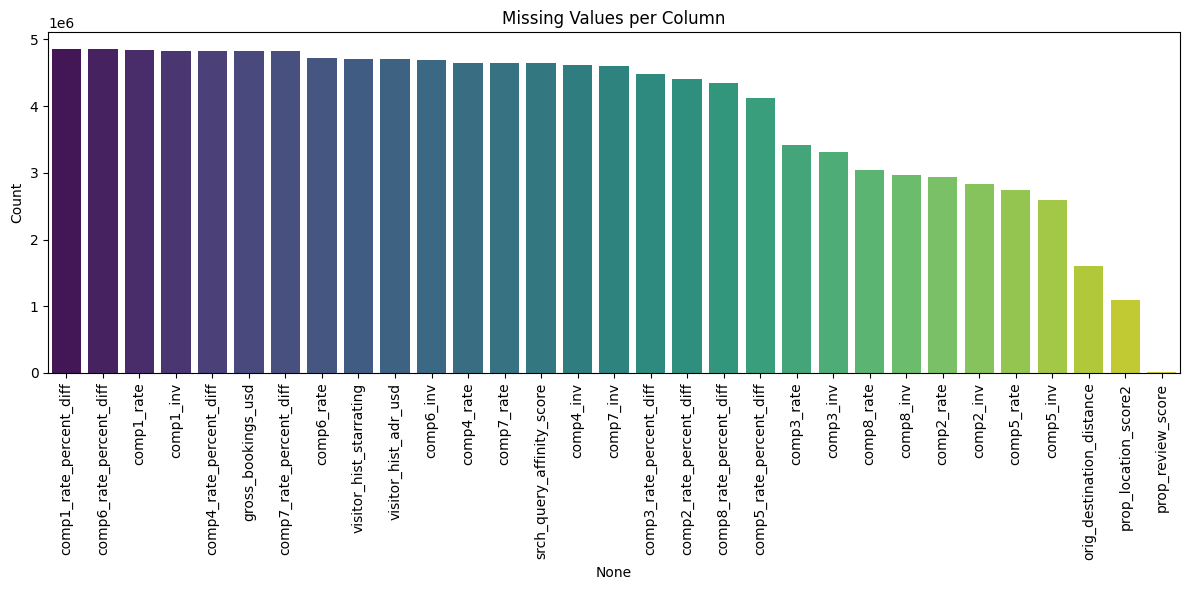

/Users/madalenabarcelo/Desktop/BA/DMT/assignment_2/DataMiningTechniquesA2/data_analysis_utils.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.show()


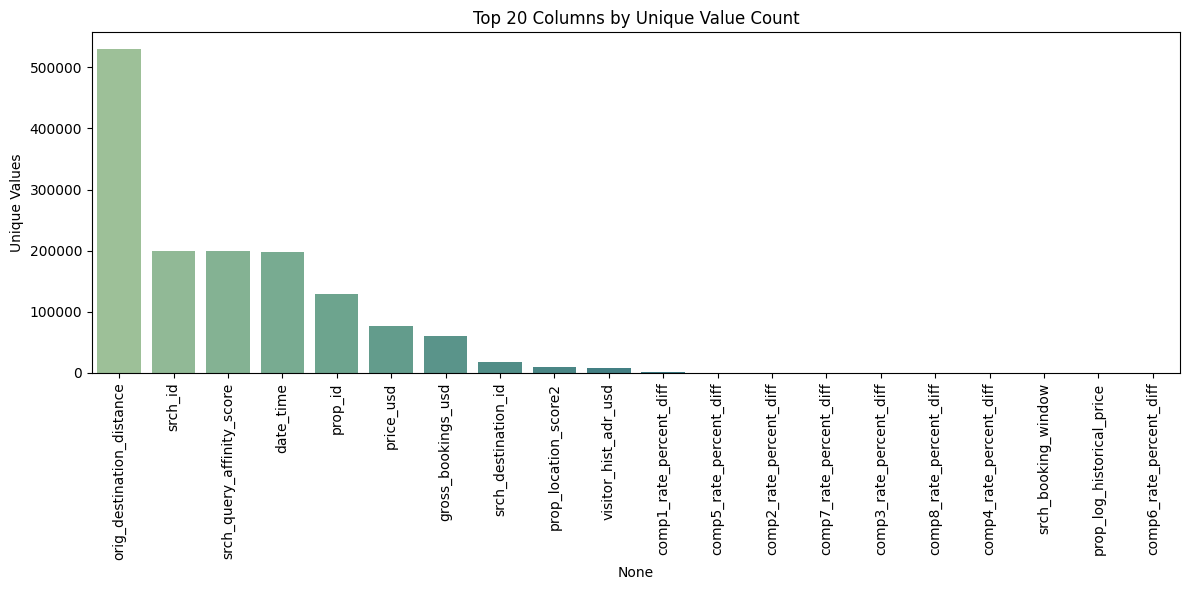

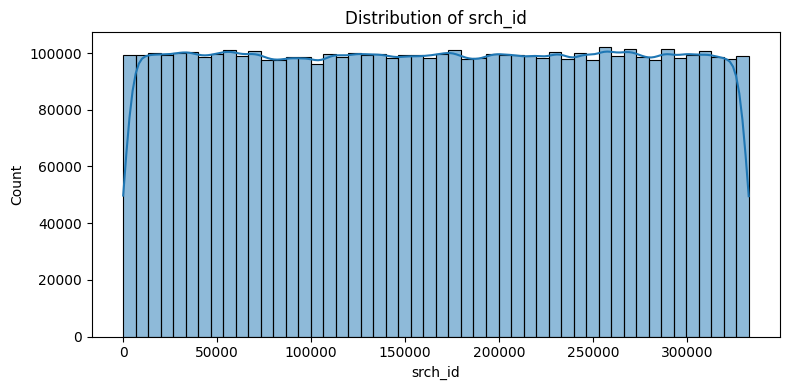

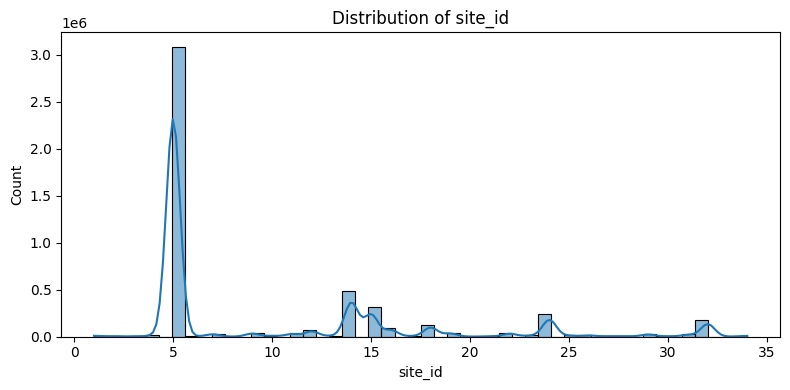

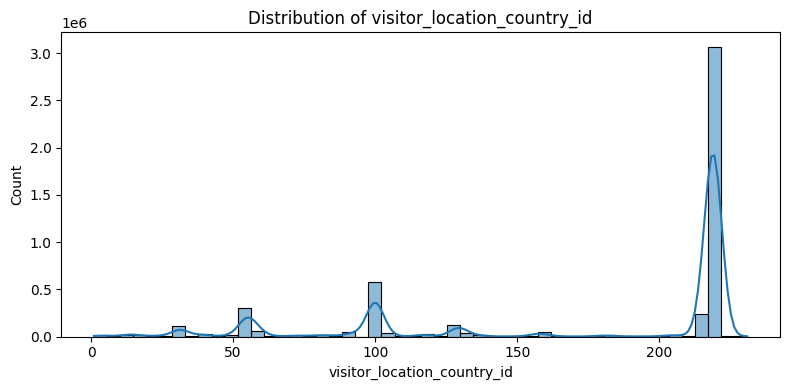

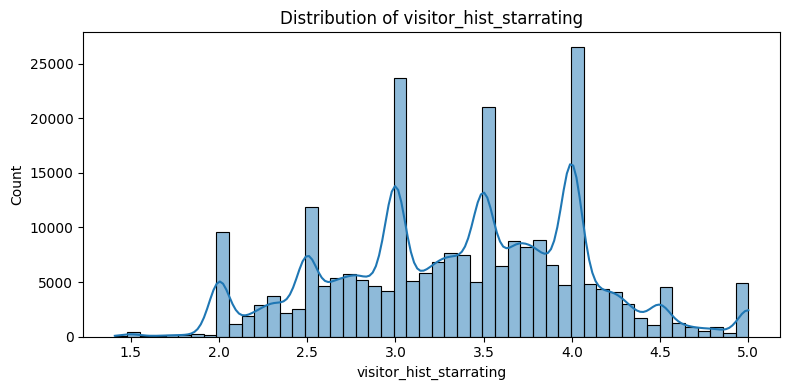

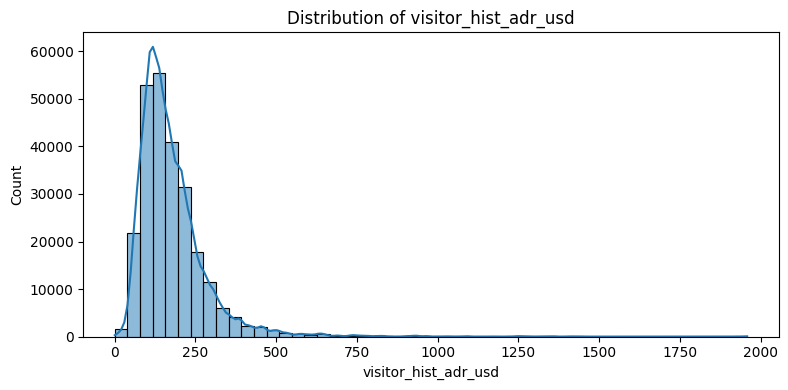

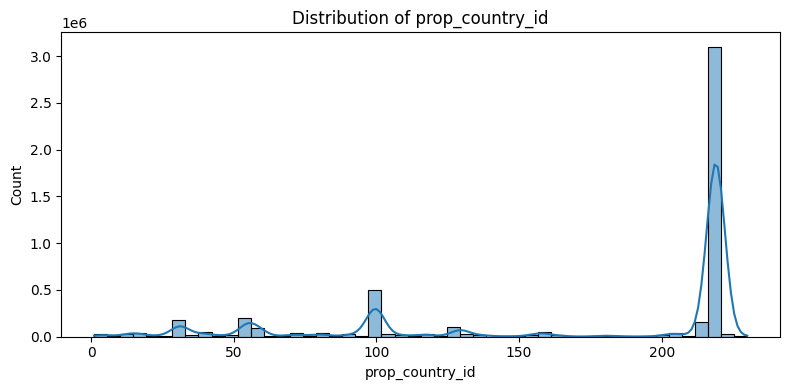

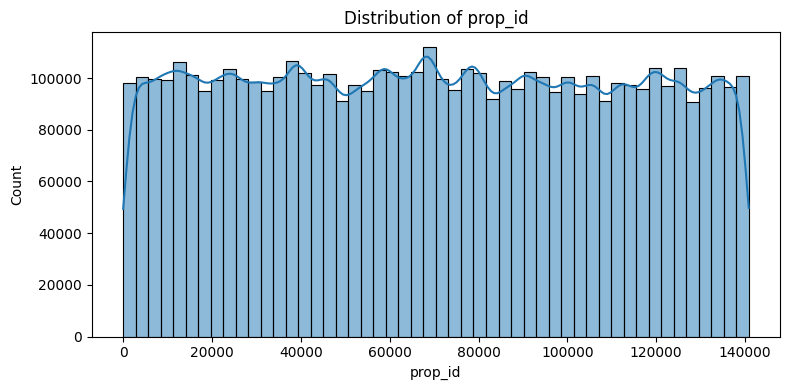

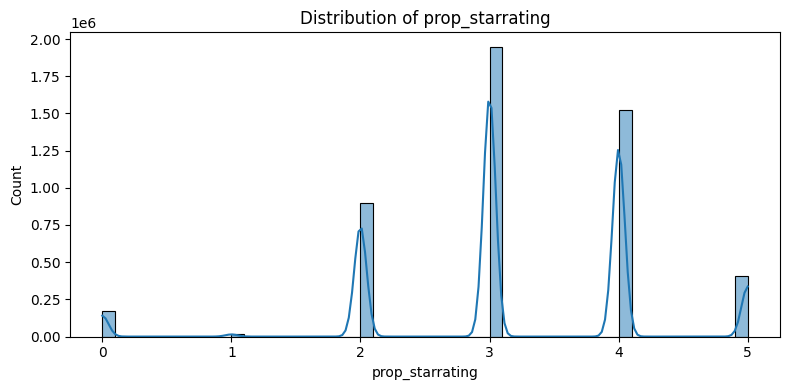

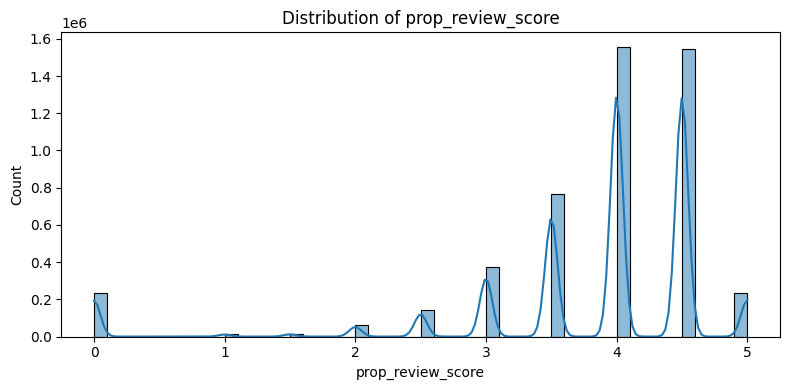

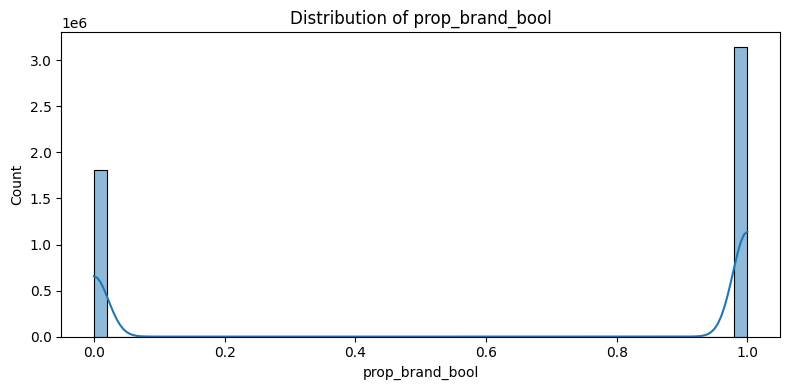

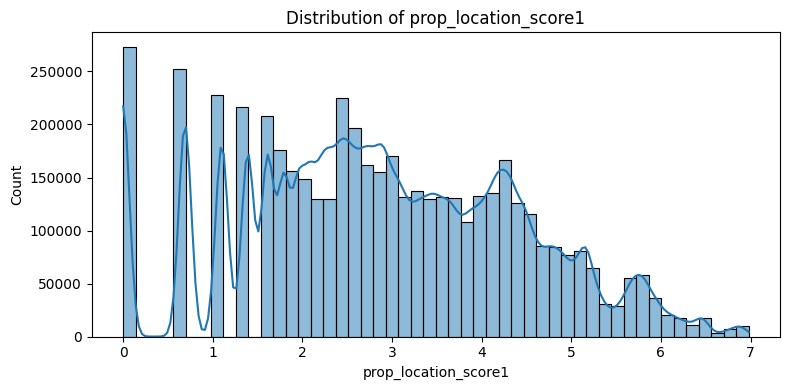

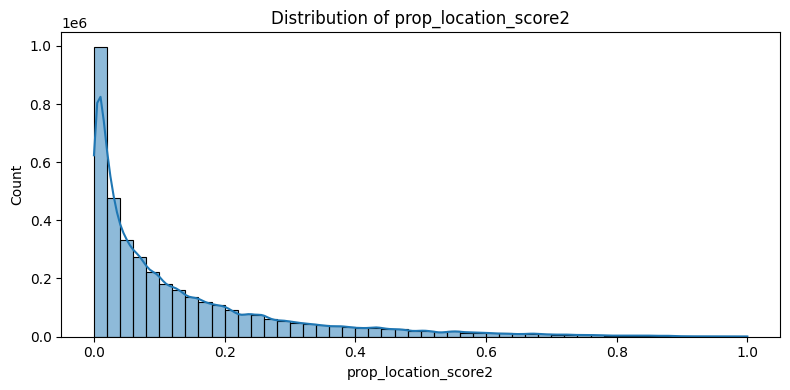

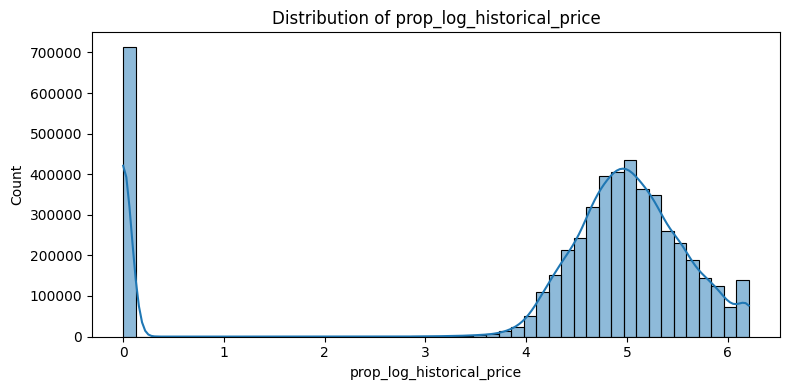

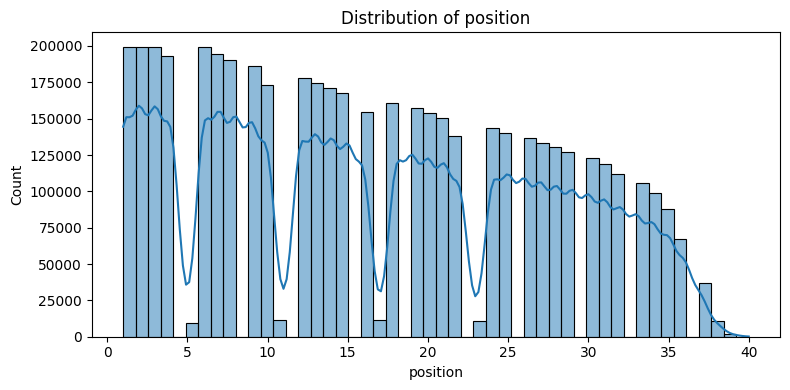

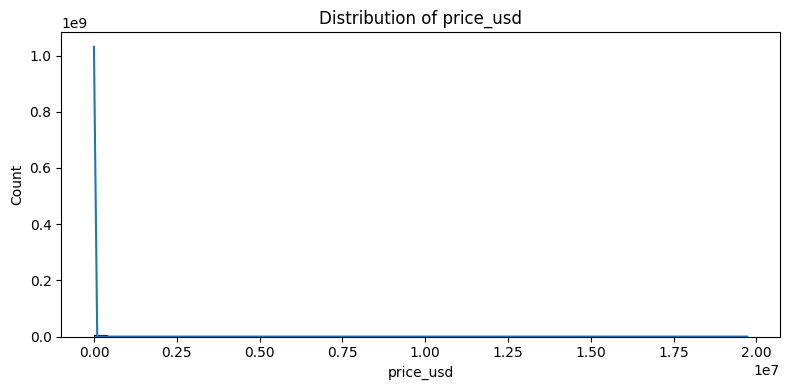

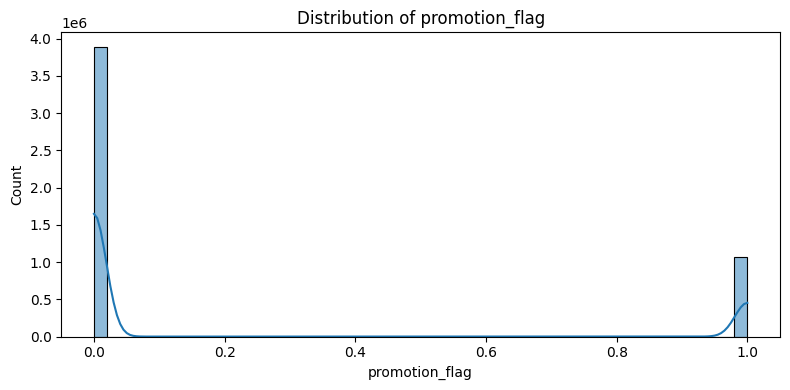

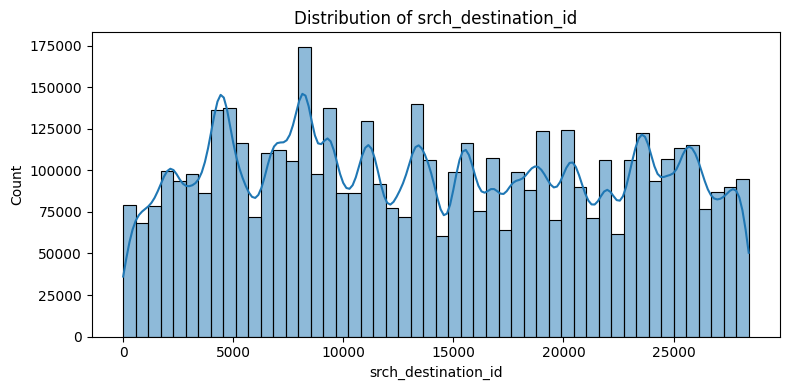

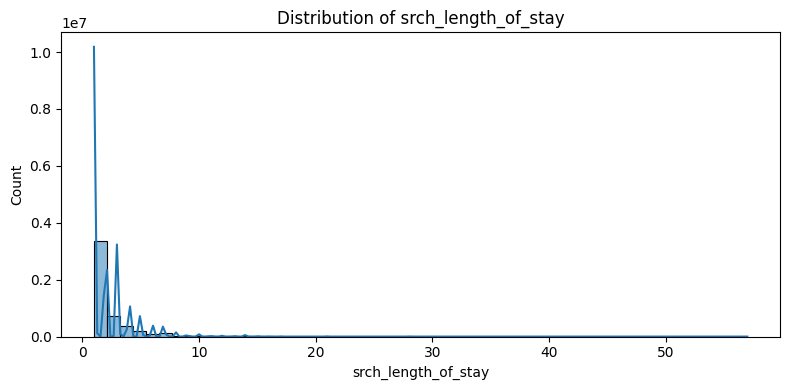

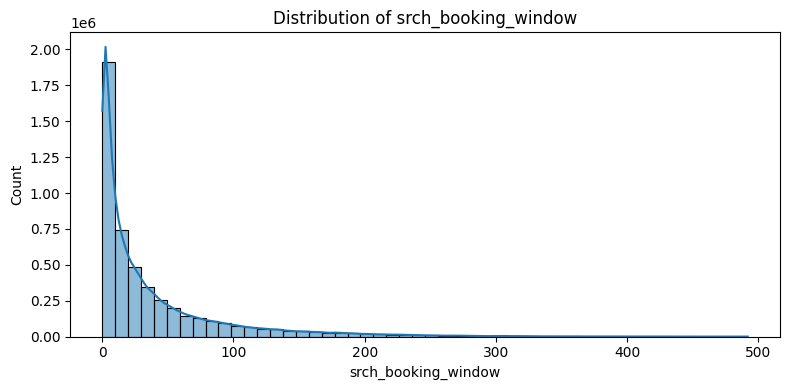

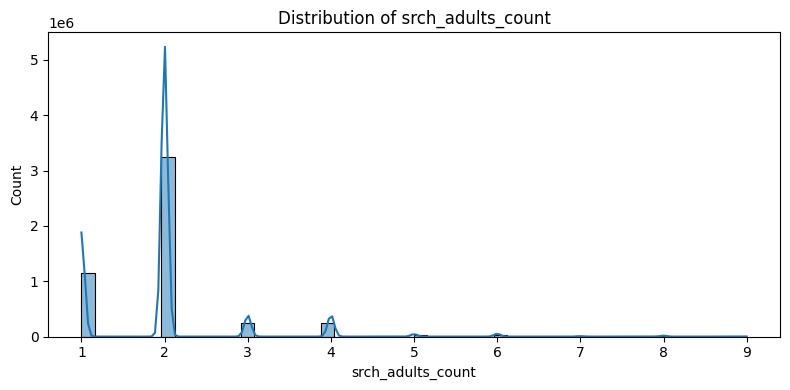

--- Test ---


/Users/madalenabarcelo/Desktop/BA/DMT/assignment_2/DataMiningTechniquesA2/data_analysis_utils.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  # Plot number of observations per id in histogram


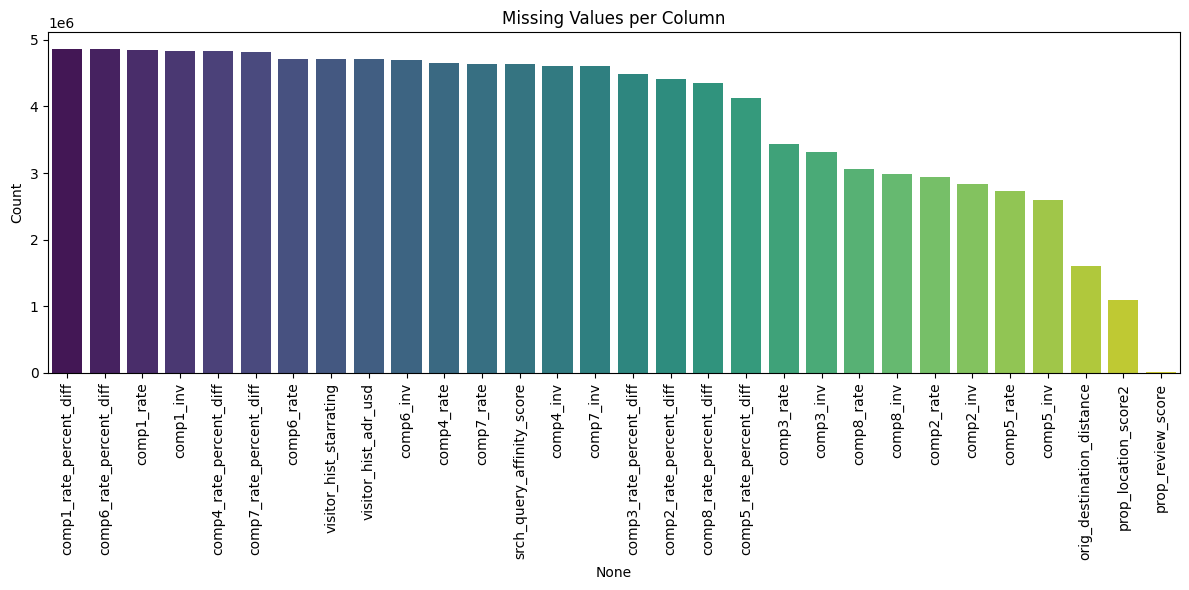

/Users/madalenabarcelo/Desktop/BA/DMT/assignment_2/DataMiningTechniquesA2/data_analysis_utils.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.show()


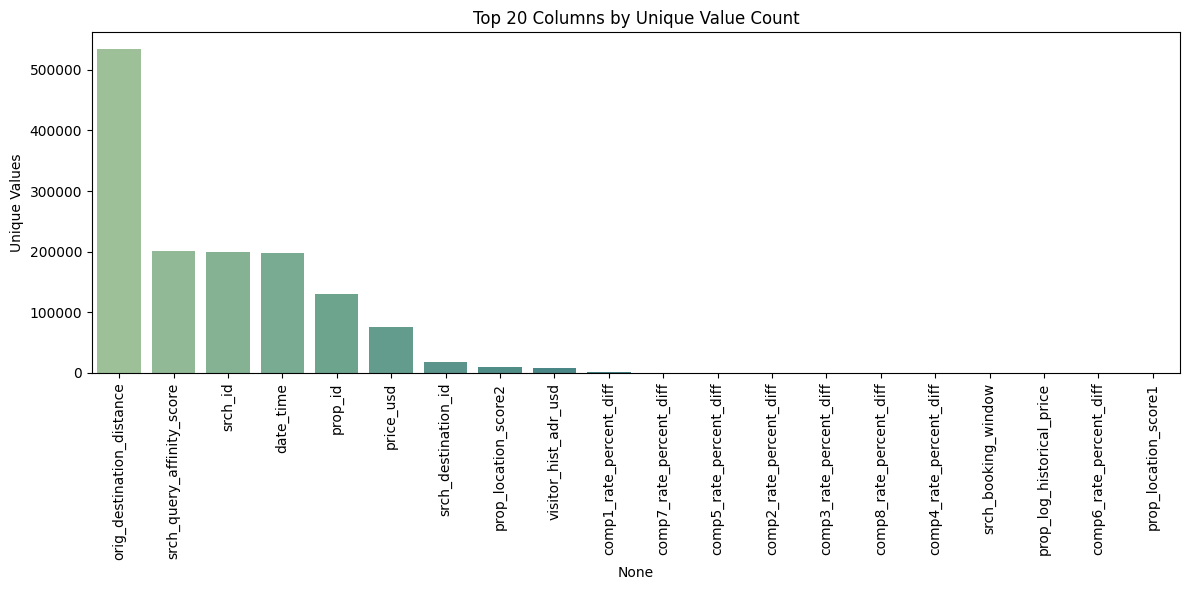

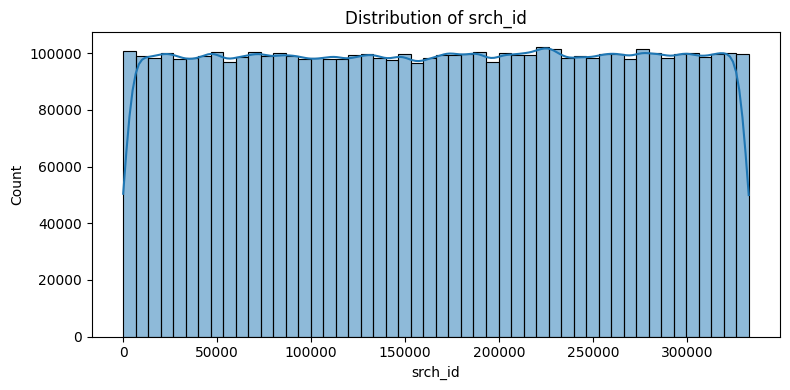

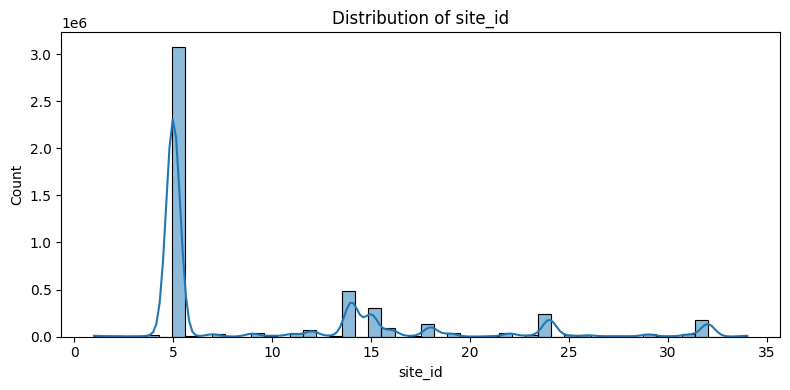

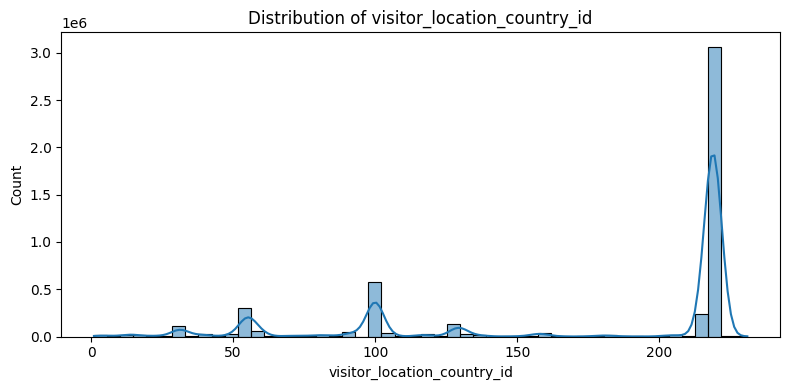

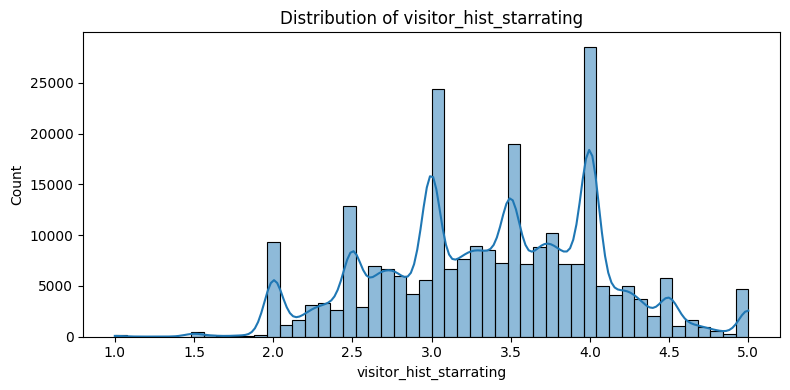

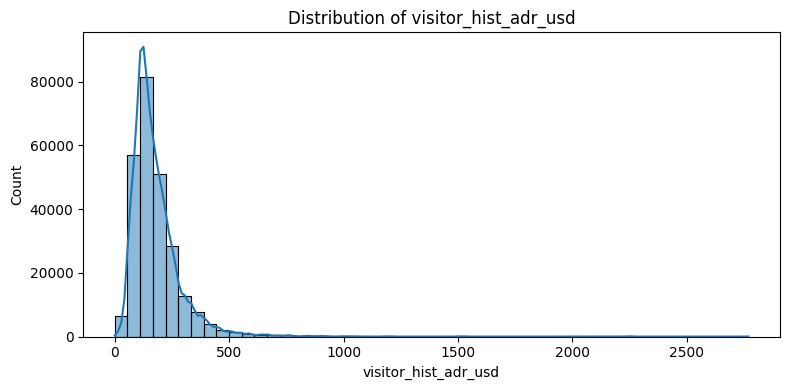

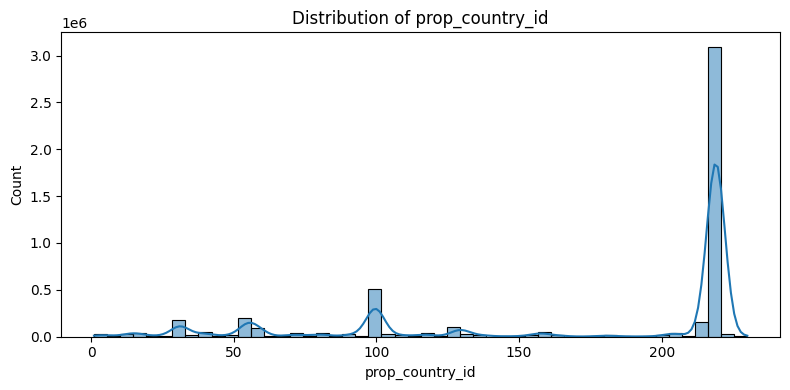

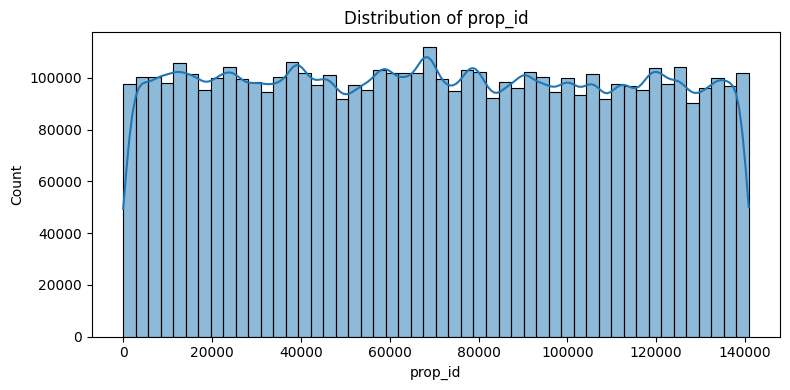

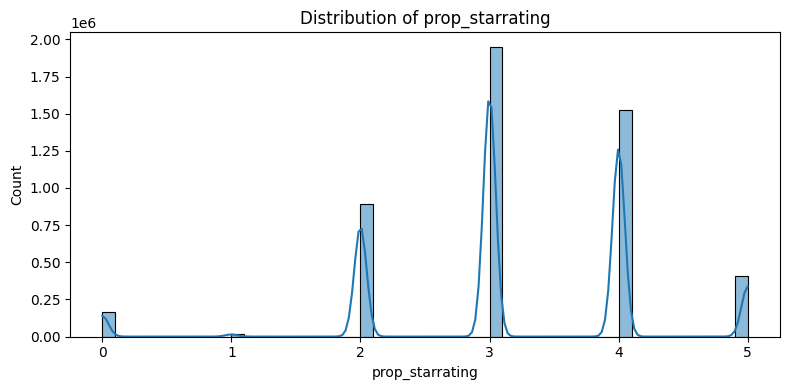

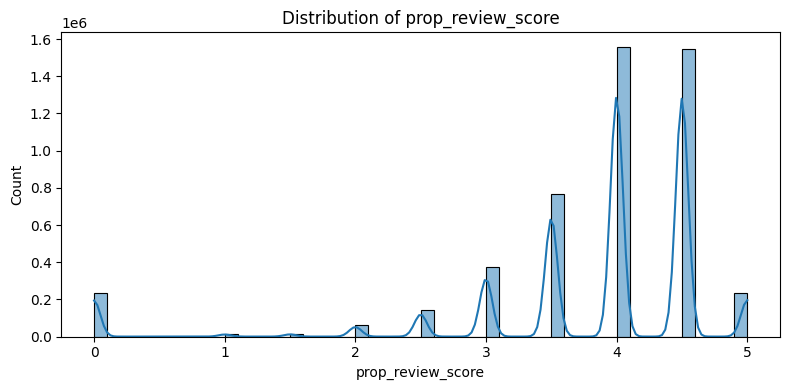

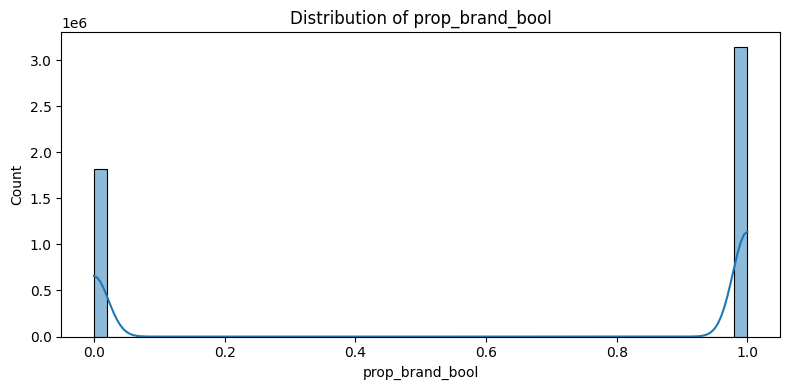

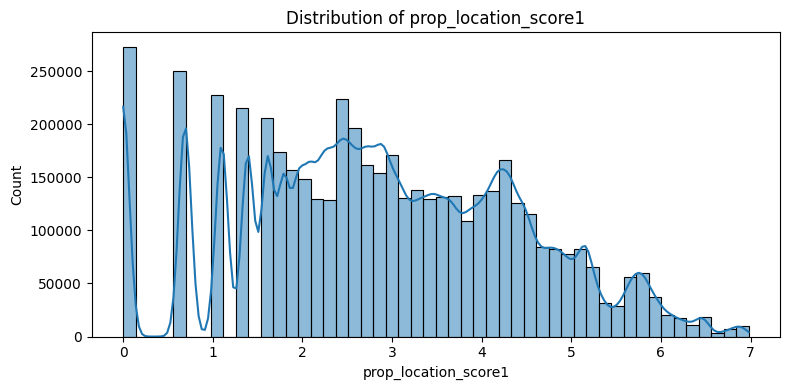

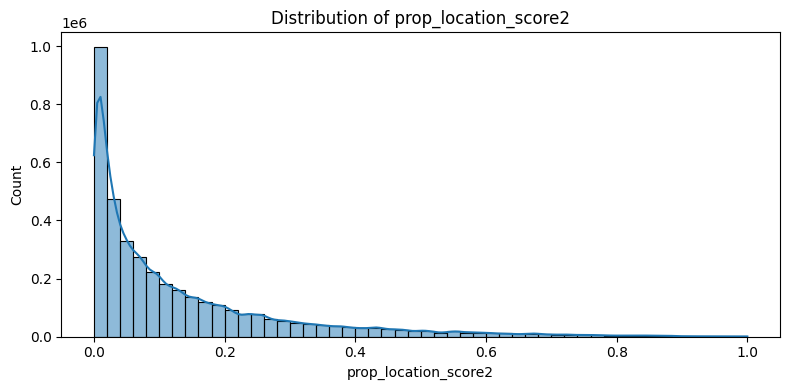

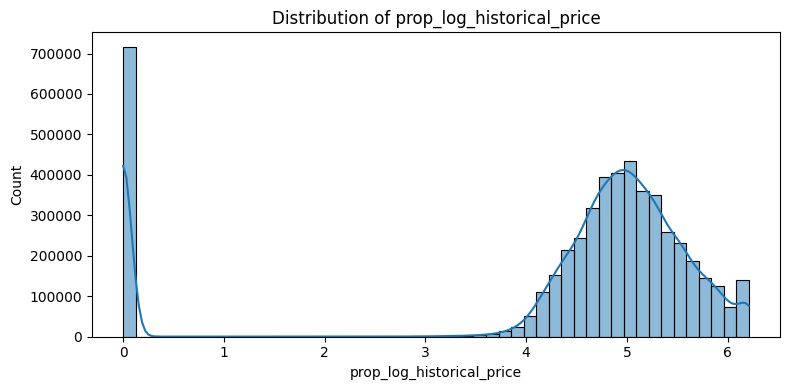

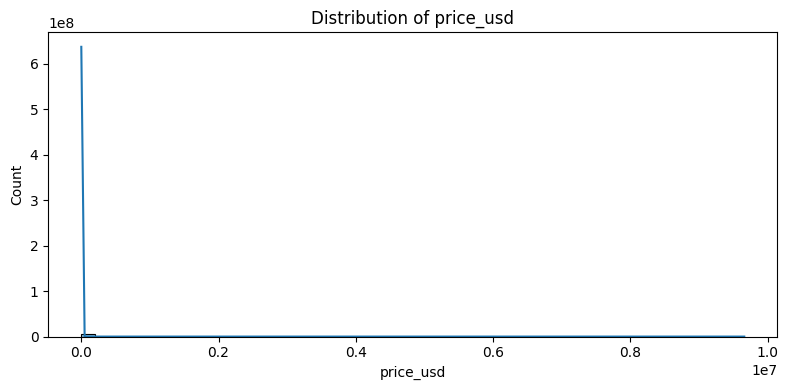

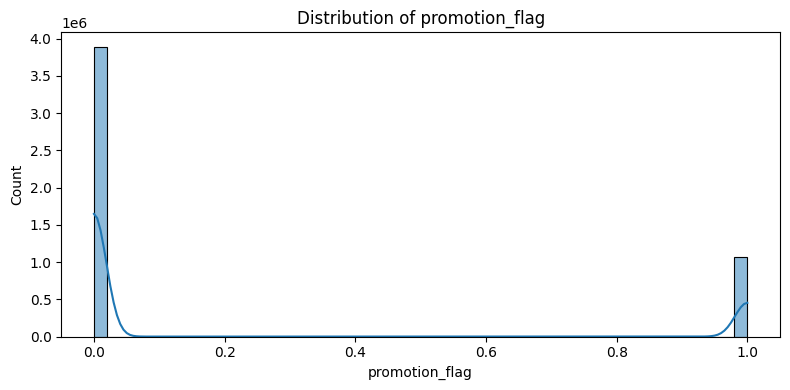

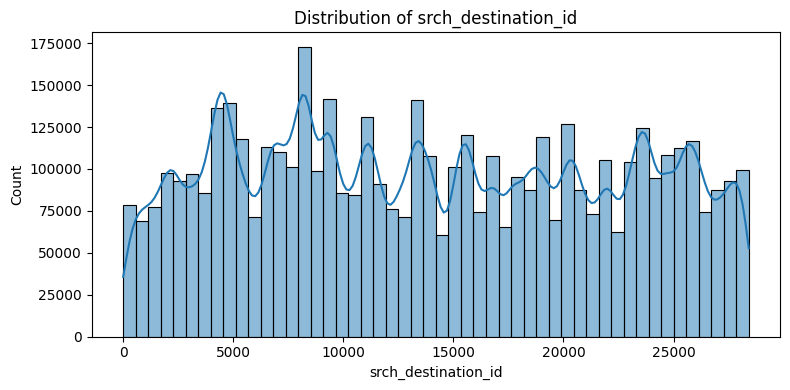

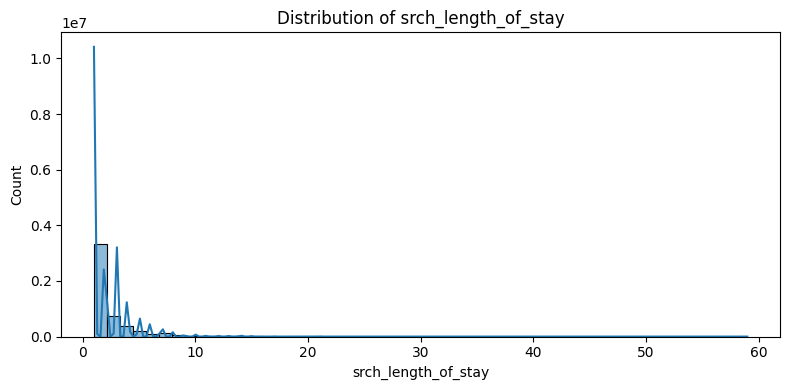

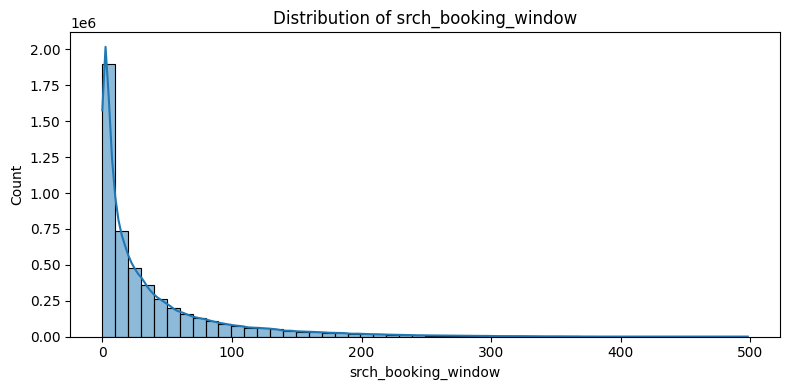

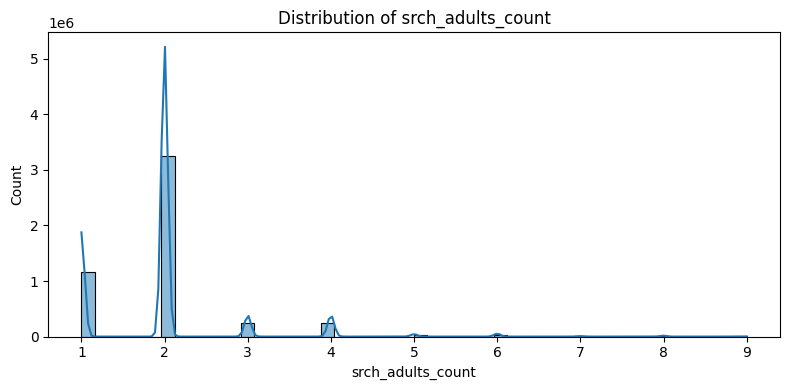

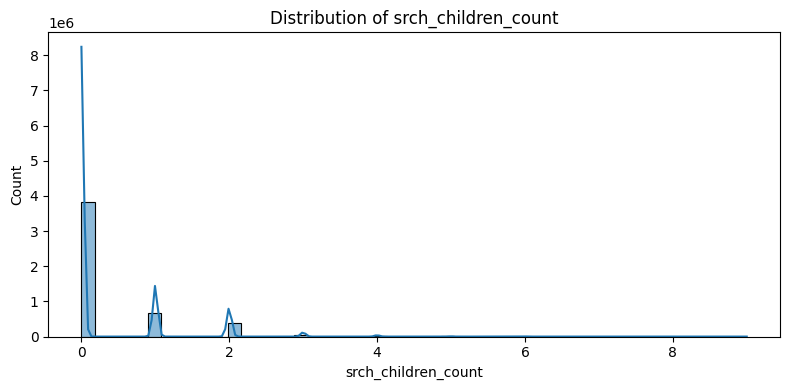

In [13]:

print('--- Train ---')
data_explorer.get_expedia_data_plots(train_df)
print('--- Test ---')
data_explorer.get_expedia_data_plots(test_df)

## Missing Values Visualization

--- Train ---


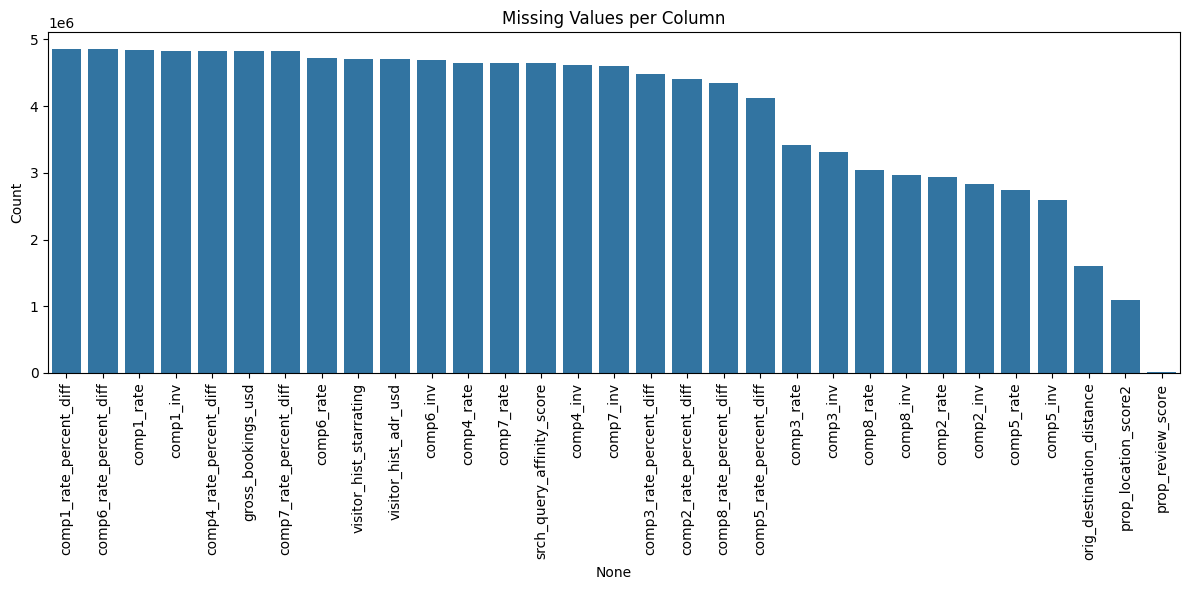

--- Test ---


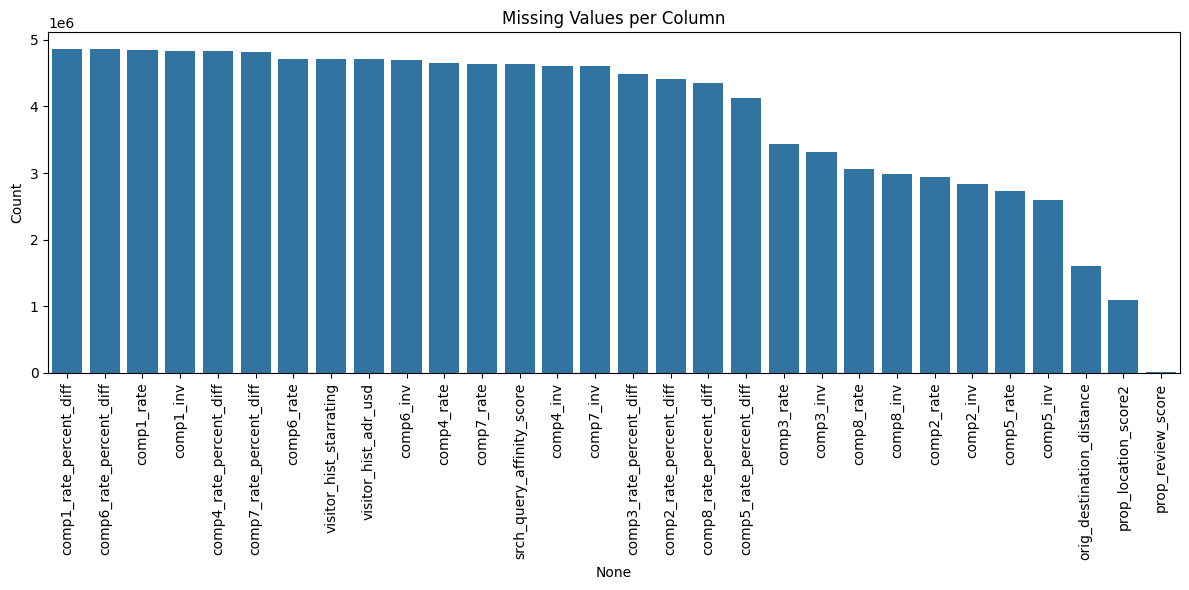

In [15]:
print('--- Train ---')
data_explorer.plot_missing_values(train_df)
print('--- Test ---')
data_explorer.plot_missing_values(test_df)

## Numeric Feature Distributions

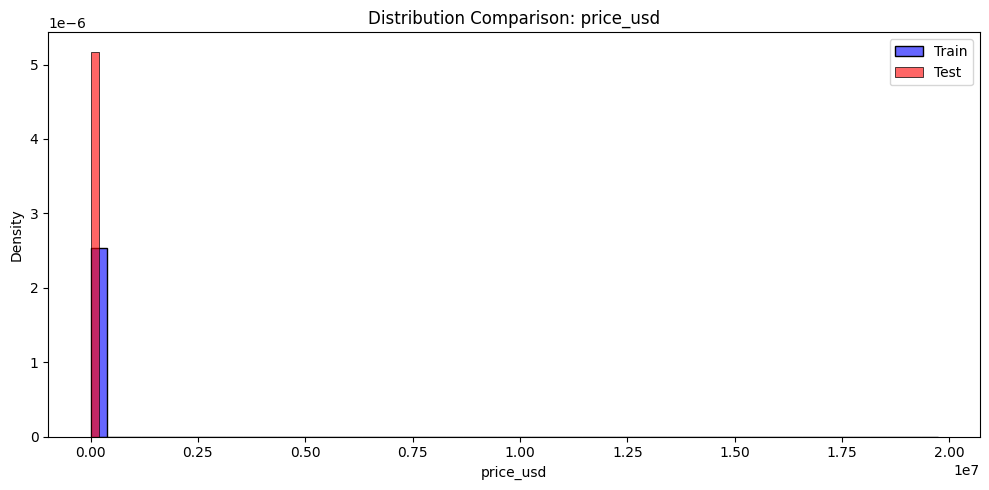

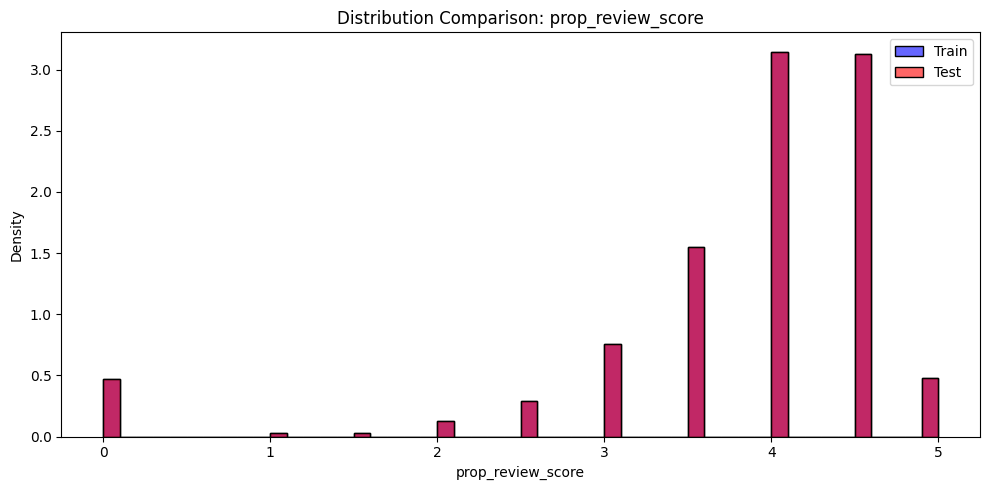

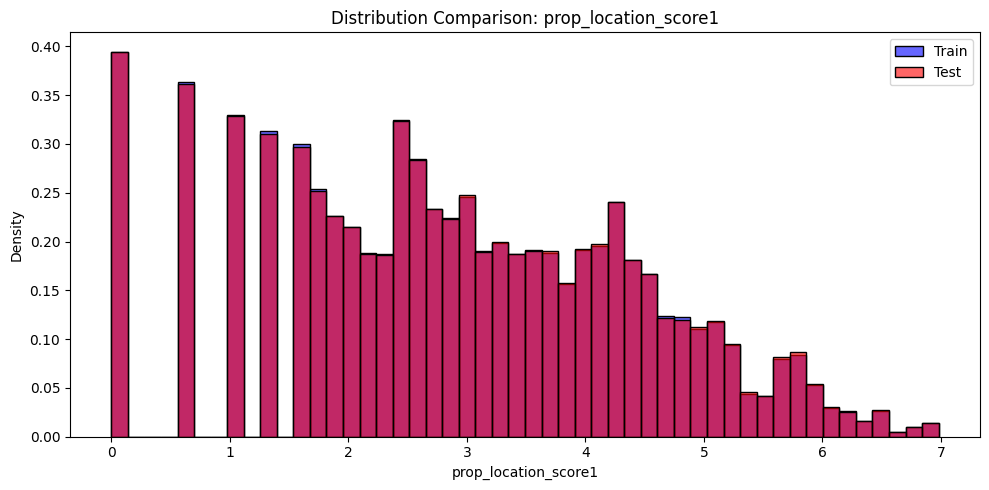

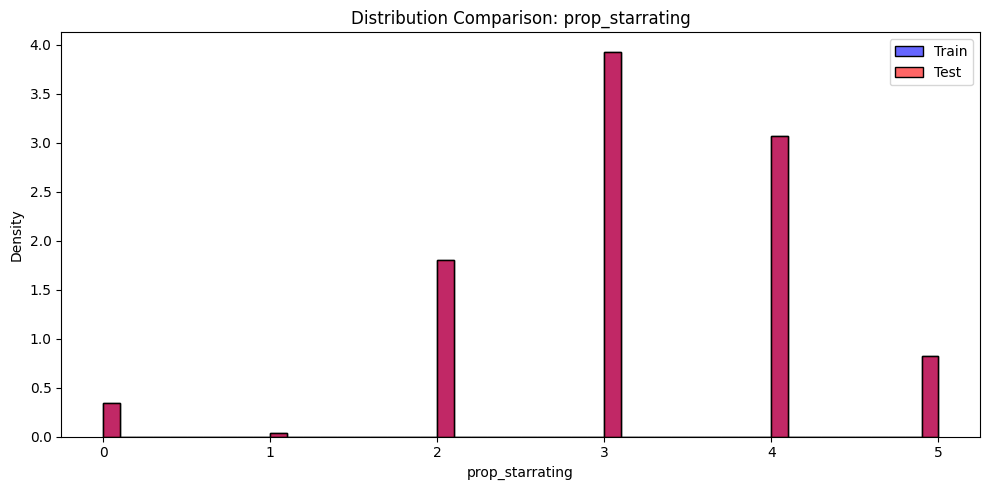

In [16]:
columns_to_plot = ['price_usd', 'prop_review_score', 'prop_location_score1', 'prop_starrating']

for col in columns_to_plot:
    if col in train_df.columns and col in test_df.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(train_df[col], bins=50, color='blue', label='Train', kde=False, stat='density', alpha=0.6)
        sns.histplot(test_df[col], bins=50, color='red', label='Test', kde=False, stat='density', alpha=0.6)
        plt.title(f'Distribution Comparison: {col}')
        plt.legend()
        plt.tight_layout()
        plt.show()

## Booking and Click Rates

Booking Rate: 0.027910511305481445
Click Rate: 0.04474858254172207


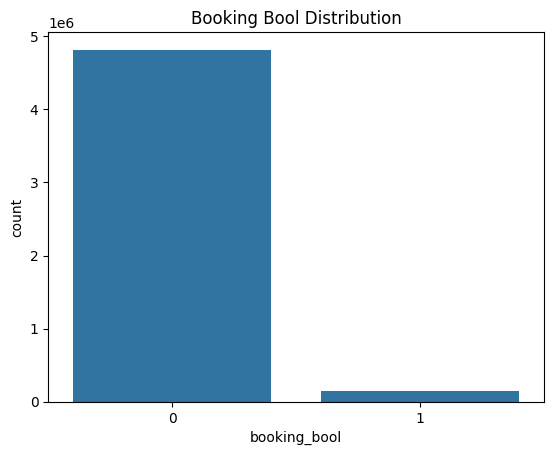

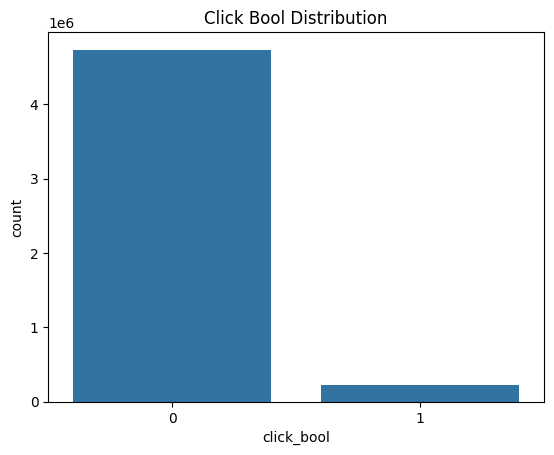

In [17]:
# Only for Train
data_explorer.booking_click_rates(train_df)

## Feature Correlation with Booking

In [18]:
data_explorer.correlate_features_with_target(train_df, target='booking_bool')

Top correlations with booking_bool:
booking_bool                 1.000000
click_bool                   0.782889
prop_location_score2         0.066405
promotion_flag               0.036047
prop_review_score            0.025800
srch_query_affinity_score    0.025524
comp8_rate                   0.023607
prop_starrating              0.021206
comp5_rate                   0.020827
comp4_rate                   0.017926
Name: booking_bool, dtype: float64

Lowest correlations:
srch_adults_count     -0.005376
comp6_inv             -0.005906
comp7_inv             -0.006155
comp3_inv             -0.007438
comp1_inv             -0.007850
srch_booking_window   -0.019582
srch_length_of_stay   -0.024412
random_bool           -0.088891
position              -0.147918
gross_bookings_usd          NaN
Name: booking_bool, dtype: float64
